In [1]:
import warnings
import numpy as np

import scipy.signal as sg
import scipy.integrate as ig

%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib import gridspec

path = '/home/lorenzo/phd/LQG/FullDynamics/sims'

M = [5.0, 7.0, 8.0, 9.0, 10.0, 20.0, 30.0, 40.0]
dxs = [0.01, 0.007, 0.005, 0.0025, 0.00125] #
# dx = 0.005


sr = 0
mr = 30000

skipped = 100

peaks = np.load('FULLDpeaks.npy', allow_pickle=True, fix_imports=True).item()
main_peak   =  peaks[1]
second_peak =  peaks[2]

for m in M:
    for dx in dxs:
        try:
            second_peak[m][dx][second_peak[m][dx][:,0] < 20, 1:] = np.NaN
        except KeyError:
            pass

In [2]:
# B = np.loadtxt(path + f'/m{m}_dx{dxs[2]}_xMax70.0/outputs/B.dat',     skiprows=sr, max_rows=mr)
# E = np.loadtxt(path + f'/m{ms[0]}_dx{dx}_xMax70.0/outputs/E.dat',     skiprows=sr, max_rows=mr)

In [3]:

# main_peak = {}
# second_peak = {}
# third_peak = {}

# for m in M:

#     main_peak[m]  = {}
#     second_peak[m]= {}
#     third_peak[m] = {}

#     for dx in dxs:

#         p1 = []
#         p2 = []
#         p3 = []

#         try:
#             with warnings.catch_warnings():
#                 warnings.filterwarnings("ignore",category=UserWarning)
#                 x = np.loadtxt(path + f'/m{m}_dx{dx}_xMax70.0_tf400.0_r05.0_a013.3/outputs/xs.dat')
#                 r = np.loadtxt(path + f'/m{m}_dx{dx}_xMax70.0_tf400.0_r05.0_a013.3/outputs/rho.dat',   skiprows=sr, max_rows=mr)
#                 t = np.loadtxt(path + f'/m{m}_dx{dx}_xMax70.0_tf400.0_r05.0_a013.3/outputs/times.dat', skiprows=sr, max_rows=mr)

#             for idx in range(len(t)):
#                 idx_MAX = sg.find_peaks(r[idx, skipped:], height=[1e-2], distance=2)[0][::-1]

#                 if len(idx_MAX) == 1:
#                     p1.append([t[idx, 0], x[skipped+idx_MAX[0]], skipped+idx_MAX[0], idx])
#                     p2.append([t[idx, 0], np.NaN, np.NaN, np.NaN])
#                     p3.append([t[idx, 0], np.NaN, np.NaN, np.NaN])
#                 elif len(idx_MAX)  == 2:
#                     p1.append([t[idx, 0], x[skipped+idx_MAX[0]], skipped+idx_MAX[0], idx])
#                     p2.append([t[idx, 0], x[skipped+idx_MAX[1]], skipped+idx_MAX[1], idx])
#                     p3.append([t[idx, 0], np.NaN, np.NaN, np.NaN])
#                 elif len(idx_MAX)  == 3:
#                     p1.append([t[idx, 0], x[skipped+idx_MAX[0]], skipped+idx_MAX[0], idx])
#                     p2.append([t[idx, 0], x[skipped+idx_MAX[1]], skipped+idx_MAX[1], idx])
#                     p3.append([t[idx, 0], x[skipped+idx_MAX[2]], skipped+idx_MAX[2], idx])
#                 else:
#                     pass
#                     # print("too many peaks!")

#             main_peak[m][dx]   = np.array(p1)
#             second_peak[m][dx] = np.array(p2)
#             third_peak[m][dx]  = np.array(p3)

#             # second_peak[m][dx][second_peak[m][dx][:,0] < 50, 1:] = np.NaN
#             # third_peak[m][dx][third_peak[m][dx][:,0] < 220, 1:] = np.NaN

#         except:
#             print(f"m{m}_dx{dx}_xMax70.0_tf400.0_r05.0_a013.3 not found!" )

# for m in M:
#     for dx in dxs:
#         try:
#             second_peak[m][dx][second_peak[m][dx][:,0] < 20, 1:] = np.NaN
#         except KeyError:
#             pass

# peaks={}
# peaks[1] = main_peak
# peaks[2] = second_peak
# peaks[3] = third_peak
# np.save('FULLDpeaks.npy', peaks)

NameError: name 'main_peak1' is not defined

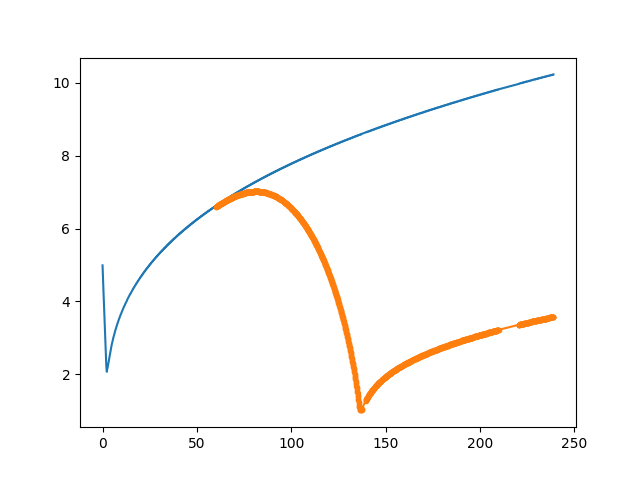

In [3]:
fig = plt.figure()

id = M[0]

for dx in [0.01]:
    try:
        plt.plot(main_peak[id][dx][:,0], main_peak[id][dx][:,1], label = f'Main, {dx = }')
    except KeyError:
        pass
    
for dx in [0.01]:
    try:
        plt.plot(second_peak[id][dx][:,0], second_peak[id][dx][:,1], '.-', label = f'Second, {dx = }')
    except KeyError:
        pass

# for dx in [0.01]:
#     try:
#         plt.plot(main_peak1[id][dx][:,0], main_peak1[id][dx][:,1], label = f'Main, {dx = }, patched')
#     except KeyError:
#         pass
    
# for dx in [0.01]:
#     try:
#         plt.plot(second_peak1[id][dx][:,0], second_peak1[id][dx][:,1], '.-', label = f'Second, {dx = }, patched')
#     except KeyError:
#         pass

# plt.plot(third_peak[id][dx][:,0], third_peak[id][dx][:,1], '.-', color = 'b', label = 'Third')

plt.xlabel("Time")
plt.ylabel("Peak position")

plt.title(f'm = {id}')
plt.legend()


## Convergence of creation point

In [8]:
ddd = {}

for id in M:
    ddd[id] = {}
    for dx in dxs:
        ddd[id][dx] = {}
        try:
            for i in range(len(second_peak[id][dx][:,1])):
                if not np.isnan(second_peak[id][dx][i,1]):
                    if second_peak[id][dx][i,1] < 1.9:
                        continue
                    
                    print(f'm = {id}, dx = {dx}; time = {second_peak[id][dx][i,0]}, position = {second_peak[id][dx][i,1]}, index = {i}')
                    ddd[id][dx]['first_index'] = i
                    ddd[id][dx]['peaks'] = second_peak[id][dx][i,1]
                    ddd[id][dx]['time_pos'] = second_peak[id][dx][i,0]
                    break
        except KeyError:
            pass

m = 5.0, dx = 0.01; time = 60.100100000871585, position = 6.600001, index = 582
m = 5.0, dx = 0.007; time = 73.6400699996665, position = 7.0420007, index = 1023
m = 5.0, dx = 0.005; time = 87.25005000233463, position = 7.4350005, index = 1705
m = 5.0, dx = 0.0025; time = 115.12502498901026, position = 8.12250025, index = 4522
m = 5.0, dx = 0.00125; time = 139.3500124739748, position = 8.630000125, index = 10980
m = 7.0, dx = 0.01; time = 74.10010000133633, position = 7.950001, index = 721
m = 7.0, dx = 0.007; time = 93.10006999794213, position = 8.5470007, index = 1301
m = 7.0, dx = 0.005; time = 111.90005000315293, position = 9.0650005, index = 2198
m = 7.0, dx = 0.0025; time = 151.55002497986683, position = 9.98500025, index = 5976
m = 7.0, dx = 0.00125; time = 186.53751246212977, position = 10.666250125, index = 14750
m = 8.0, dx = 0.01; time = 80.60010000155211, position = 8.560001, index = 786
m = 8.0, dx = 0.007; time = 102.13006999714197, position = 9.2260007, index = 1430
m = 8

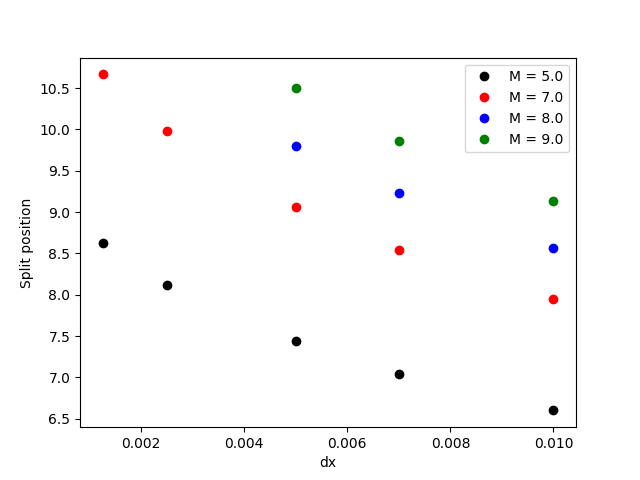

In [16]:
fig = plt.figure()
color = iter(['k', 'r', 'b', 'g', 'c', 'm', 'y'])

for m in M[:4]:
    c = next(color)
    
    for dx in ddd[m].keys():
        try:
            plt.plot(dx, ddd[m][dx]['peaks'], 'o', color = c, label = f"M = {m}")
        except:
            pass
plt.xlabel('dx')
plt.ylabel('Split position')


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

## Fit position of split vs mass

In [8]:
first_index = []
peaks = []
time_pos = []

dx = 0.005

for id in M:
    for i in range(len(second_peak[id][dx][:,1])):
        if not np.isnan(second_peak[id][dx][i,1]):
            print(f'm = {id}, dx = {dx}; time = {second_peak[id][dx][i,0]}, position = {second_peak[id][dx][i,1]}, index = {i}')
            first_index.append(i)
            peaks.append(second_peak[id][dx][i,1])
            time_pos.append(second_peak[id][dx][i,0])
            break

m = 5.0, dx = 0.005; time = 87.25005000233463, position = 7.4350005, index = 1705
m = 7.0, dx = 0.005; time = 111.90005000315293, position = 9.0650005, index = 2198
m = 8.0, dx = 0.005; time = 123.55005000353967, position = 9.8050005, index = 2431
m = 9.0, dx = 0.005; time = 134.80005000198042, position = 10.505000500000001, index = 2655
m = 10.0, dx = 0.005; time = 145.85004999920665, position = 11.175000500000001, index = 2876
m = 20.0, dx = 0.005; time = 243.7000499746443, position = 16.7400005, index = 4833
m = 30.0, dx = 0.005; time = 324.7500499542991, position = 21.105000500000003, index = 6453
m = 40.0, dx = 0.005; time = 393.4000499370665, position = 24.770000500000002, index = 7825


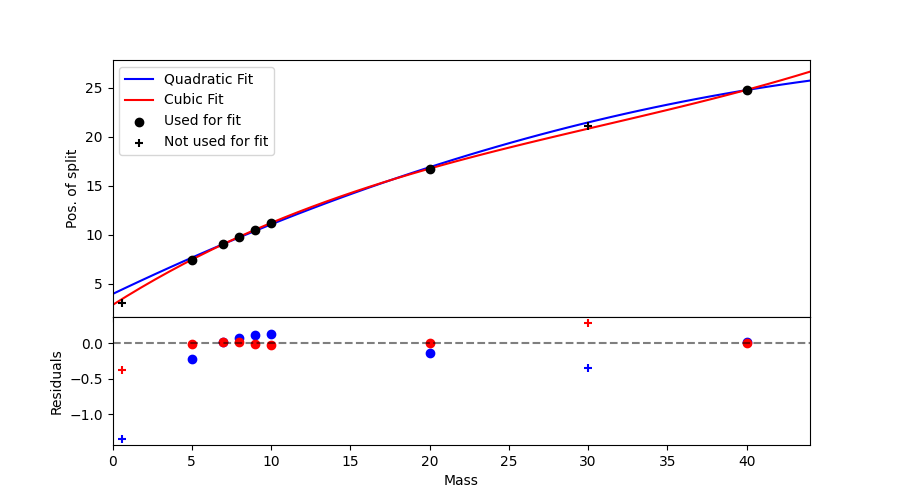

Quadratic best fit parameters: (-0.006 +- 0.001) x^2 + (0.773 +- 0.03) x + (3.944 +- 0.222)
Cubic best fit parameters: (0.00023 +- 1e-05) x^3 + (-0.021 +- 0.00095) x^2 + (1.023 +- 0.01666) x + (2.828 +- 0.07796)



In [9]:
from scipy.optimize import curve_fit

def quad(x, a, b, c):
    return a*x**2 + b*x + c
def cubic(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

mask = np.array([True, True, True, True, True, True, False, True])
peak_pos = np.array(peaks)[mask]
ms = np.array(M)[mask]

G_pos = np.array(peaks)[~mask]
G_mas = np.array(M)[~mask]

mass_measure = np.array([0.59])
peak_measure = np.array([3.05])

qopt, qcov = curve_fit(quad, ms, peak_pos)
copt, ccov = curve_fit(cubic, ms, peak_pos)

mm = np.linspace(0, 1.1*ms[-1])

fig = plt.figure(figsize=(9,5))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

ax0 = plt.subplot(gs[0])
ax0.plot(mm, quad(mm, *qopt), color = 'b', zorder = 1, label = 'Quadratic Fit')
ax0.plot(mm, cubic(mm, *copt), color = 'r', zorder = 1, label = 'Cubic Fit')

ax0.scatter(ms, peak_pos, color = 'k', marker='o', zorder = 2, label = 'Used for fit')
ax0.scatter(G_mas, G_pos, color = 'k', marker='+', zorder = 2, label = 'Not used for fit')
ax0.scatter(mass_measure, peak_measure, color = 'k', zorder = 2, marker='+')
# ax0.plot([20, 40], [15.226,20.156], 'x', label = 'Quadratic Prediction')
# ax0.plot([20, 40], [18.029, 35.237],'x', label = 'Cubic Prediction' )

ax0.set_ylabel('Pos. of split')
ax0.set_xlim(0, 1.1*ms[-1])

ax0.legend()

###############
### RESIDUALS
###############

ax1 = plt.subplot(gs[1], sharex = ax0)

ax1.axhline(0, ls = '--', color = 'k', alpha = 0.5)
# Residuals of fitted points
ax1.scatter(ms, -quad(ms, *qopt) + peak_pos, color = 'b')
ax1.scatter(ms, -cubic(ms, *copt) + peak_pos, color = 'r')
# Residuals of control points
ax1.scatter(G_mas, -quad(G_mas, *qopt) + G_pos,  marker = '+', color = 'b')
ax1.scatter(G_mas, -cubic(G_mas, *copt) + G_pos, marker = '+',  color = 'r')
ax1.scatter(mass_measure, -quad(mass_measure, *qopt) + peak_measure,  marker = '+', color = 'b')
ax1.scatter(mass_measure, -cubic(mass_measure, *copt) + peak_measure, marker = '+',  color = 'r')

ax1.set_xlabel('Mass')
ax1.set_ylabel('Residuals')

ax1.set_xlim(0, 1.1*ms[-1])

# remove vertical gap between subplots
plt.setp(ax0.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)
plt.show()

# Errors in parameters
s_qcov = np.round(np.sqrt(np.diagonal(qcov)), 3)
s_ccov = np.round(np.sqrt(np.diagonal(ccov)), 5)

text_quad = f"Quadratic best fit parameters: ({np.round(qopt[0],3)} +- {s_qcov[0]}) x^2 + ({np.round(qopt[1],3)} +- {s_qcov[1]}) x + ({np.round(qopt[2],3)} +- {s_qcov[2]})"
text_cubic = f"Cubic best fit parameters: ({np.round(copt[0],5)} +- {s_ccov[0]}) x^3 + ({np.round(copt[1],3)} +- {s_ccov[1]}) x^2 + ({np.round(copt[2],3)} +- {s_ccov[2]}) x + ({np.round(copt[3],3)} +- {s_ccov[3]})"

print(text_quad)
print(text_cubic)
print()

In [10]:
np.savetxt('./fits/cubic_opt.dat', copt)
np.savetxt('./fits/cubic_cov.dat', ccov)
np.savetxt('./fits/quadr_opt.dat', qopt)
np.savetxt('./fits/quadr_cov.dat', qcov)

## Post

In [11]:
import numpy as np
import scipy.signal as sg

import matplotlib.pyplot as plt
%matplotlib widget

def quad(x, a, b, c):
    return a*x**2 + b*x + c
def cubic(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

copt = np.loadtxt('./fits/cubic_opt.dat')
ccov = np.loadtxt('./fits/cubic_cov.dat')
qopt = np.loadtxt('./fits/quadr_opt.dat')
qcov = np.loadtxt('./fits/quadr_cov.dat')

In [12]:
print(f'Quadratic prediction for m={0.5911875} : {quad(0.5911875, *qopt)}')
print(f'Cubic prediction for m={0.5911875} : {cubic(0.5911875, *copt)}')

Quadratic prediction for m=0.5911875 : 4.399306176302657
Cubic prediction for m=0.5911875 : 3.4251677829205893


### Mass in split

In [13]:
peaks = np.load('FULLDpeaks.npy', allow_pickle=True, fix_imports=True).item()
main_peak   =  peaks[1]
second_peak =  peaks[2]

for m in M:
    for dx in dxs:
        try:
            second_peak[m][dx][second_peak[m][dx][:,0] < 20, 1:] = np.NaN
        except KeyError:
            pass

m = M[0]
dx = dxs[2]

sr = int(second_peak[m][dx][np.isfinite(second_peak[m][dx][:, 3]), 3][0] - 200 )
mr = int(second_peak[m][dx][np.isfinite(second_peak[m][dx][:, 3]), 3][0] + 500 )

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=UserWarning)
    x = np.loadtxt(path + f'/m{m}_dx{dx}_xMax70.0_tf400.0_r05.0_a013.3/outputs/xs.dat')
    r = np.loadtxt(path + f'/m{m}_dx{dx}_xMax70.0_tf400.0_r05.0_a013.3/outputs/rho.dat',   skiprows=sr, max_rows=mr)
    t = np.loadtxt(path + f'/m{m}_dx{dx}_xMax70.0_tf400.0_r05.0_a013.3/outputs/times.dat', skiprows=sr, max_rows=mr)

0.5540163193675559


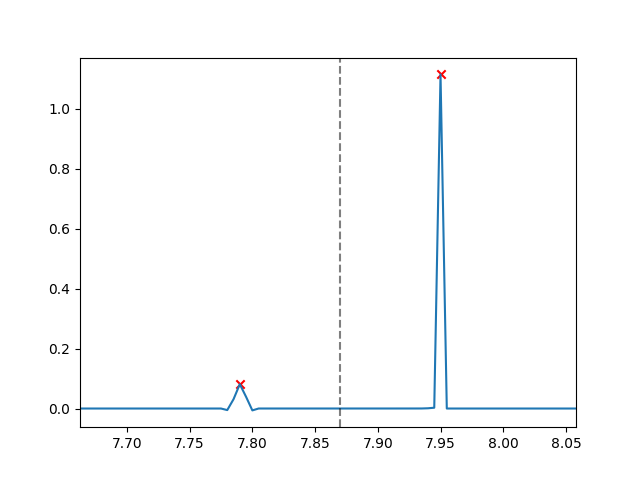

In [14]:
ii = 600

idx_MAX = sg.find_peaks(r[ii, 10:], height=[1e-2], distance=2)[0][::-1]
mn = np.mean(x[10+idx_MAX])

fig = plt.figure()
plt.plot(x[10:], r[ii, 10:])
plt.scatter(x[10+idx_MAX], r[ii, 10+idx_MAX], marker='x', color='red', label='Maxima')
plt.xlim(np.min(x[idx_MAX])*0.99, np.max(x[idx_MAX])*1.02)

if len(idx_MAX) > 1:
    plt.axvline(mn, ls='--', color='k', alpha=0.5)

mass = 4*np.pi * ig.trapezoid(r[ii, (x<mn)]*x[x<mn]*x[x<mn], x[x<mn])
print(mass)


In [5]:
import warnings
import numpy as np

import scipy.signal as sg
import scipy.integrate as ig

%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib import gridspec

path = '/home/lorenzo/phd/LQG/EEbuild'

M = [5.0]
dxs = [0.01]

main_peak1 = {}
second_peak1 = {}
third_peak1 = {}

sr = 0
mr = 4000
skipped = 10

for m in M:

    main_peak1[m]  = {}
    second_peak1[m]= {}
    third_peak1[m] = {}

    for dx in dxs:

        p1 = []
        p2 = []
        p3 = []

        with warnings.catch_warnings():
            warnings.filterwarnings("ignore",category=UserWarning)
            x = np.loadtxt(path + f'/outputs/T200NewEps/xs.dat')
            r = np.loadtxt(path + f'/outputs/T200NewEps/rho.dat',   skiprows=sr, max_rows=mr)
            t = np.loadtxt(path + f'/outputs/T200NewEps/times.dat', skiprows=sr, max_rows=mr)

        for idx in range(len(t)):
            idx_MAX = sg.find_peaks(r[idx, skipped:], height=[1e-2], distance=2)[0][::-1]

            if len(idx_MAX) == 1:
                p1.append([t[idx, 0], x[skipped+idx_MAX[0]], skipped+idx_MAX[0], idx])
                p2.append([t[idx, 0], np.NaN, np.NaN, np.NaN])
                p3.append([t[idx, 0], np.NaN, np.NaN, np.NaN])
            elif len(idx_MAX)  == 2:
                p1.append([t[idx, 0], x[skipped+idx_MAX[0]], skipped+idx_MAX[0], idx])
                p2.append([t[idx, 0], x[skipped+idx_MAX[1]], skipped+idx_MAX[1], idx])
                p3.append([t[idx, 0], np.NaN, np.NaN, np.NaN])
            elif len(idx_MAX)  == 3:
                p1.append([t[idx, 0], x[skipped+idx_MAX[0]], skipped+idx_MAX[0], idx])
                p2.append([t[idx, 0], x[skipped+idx_MAX[1]], skipped+idx_MAX[1], idx])
                p3.append([t[idx, 0], x[skipped+idx_MAX[2]], skipped+idx_MAX[2], idx])
            else:
                pass
                # print("too many peaks!")

        main_peak1[m][dx]   = np.array(p1)
        second_peak1[m][dx] = np.array(p2)
        third_peak1[m][dx]  = np.array(p3)


main_peak2 = {}
second_peak2 = {}
third_peak2 = {}

sr = 0
mr = 4000
skipped = 10

for m in M:

    main_peak2[m]  = {}
    second_peak2[m]= {}
    third_peak2[m] = {}

    for dx in dxs:

        p1 = []
        p2 = []
        p3 = []

        with warnings.catch_warnings():
            warnings.filterwarnings("ignore",category=UserWarning)
            x = np.loadtxt(path + f'/outputs/T200WM/xs.dat')
            r = np.loadtxt(path + f'/outputs/T200WM/rho.dat',   skiprows=sr, max_rows=mr)
            t = np.loadtxt(path + f'/outputs/T200WM/times.dat', skiprows=sr, max_rows=mr)

        for idx in range(len(t)):
            idx_MAX = sg.find_peaks(r[idx, skipped:], height=[1e-2], distance=2)[0][::-1]

            if len(idx_MAX) == 1:
                p1.append([t[idx, 0], x[skipped+idx_MAX[0]], skipped+idx_MAX[0], idx])
                p2.append([t[idx, 0], np.NaN, np.NaN, np.NaN])
                p3.append([t[idx, 0], np.NaN, np.NaN, np.NaN])
            elif len(idx_MAX)  == 2:
                p1.append([t[idx, 0], x[skipped+idx_MAX[0]], skipped+idx_MAX[0], idx])
                p2.append([t[idx, 0], x[skipped+idx_MAX[1]], skipped+idx_MAX[1], idx])
                p3.append([t[idx, 0], np.NaN, np.NaN, np.NaN])
            elif len(idx_MAX)  == 3:
                p1.append([t[idx, 0], x[skipped+idx_MAX[0]], skipped+idx_MAX[0], idx])
                p2.append([t[idx, 0], x[skipped+idx_MAX[1]], skipped+idx_MAX[1], idx])
                p3.append([t[idx, 0], x[skipped+idx_MAX[2]], skipped+idx_MAX[2], idx])
            else:
                pass
                # print("too many peaks!")

        main_peak2[m][dx]   = np.array(p1)
        second_peak2[m][dx] = np.array(p2)
        third_peak2[m][dx]  = np.array(p3)

        # second_peak[m][dx][second_peak[m][dx][:,0] < 50, 1:] = np.NaN
        # third_peak[m][dx][third_peak[m][dx][:,0] < 220, 1:] = np.NaN


main_peak3 = {}
second_peak3 = {}
third_peak3 = {}

sr = 0
mr = 4000
skipped = 10

for m in M:

    main_peak3[m]  = {}
    second_peak3[m]= {}
    third_peak3[m] = {}

    for dx in dxs:

        p1 = []
        p2 = []
        p3 = []

        with warnings.catch_warnings():
            warnings.filterwarnings("ignore",category=UserWarning)
            x = np.loadtxt(path + f'/outputs/T200Eps/xs.dat')
            r = np.loadtxt(path + f'/outputs/T200Eps/rho.dat',   skiprows=sr, max_rows=mr)
            t = np.loadtxt(path + f'/outputs/T200Eps/times.dat', skiprows=sr, max_rows=mr)

        for idx in range(len(t)):
            idx_MAX = sg.find_peaks(r[idx, skipped:], height=[1e-2], distance=2)[0][::-1]

            if len(idx_MAX) == 1:
                p1.append([t[idx, 0], x[skipped+idx_MAX[0]], skipped+idx_MAX[0], idx])
                p2.append([t[idx, 0], np.NaN, np.NaN, np.NaN])
                p3.append([t[idx, 0], np.NaN, np.NaN, np.NaN])
            elif len(idx_MAX)  == 2:
                p1.append([t[idx, 0], x[skipped+idx_MAX[0]], skipped+idx_MAX[0], idx])
                p2.append([t[idx, 0], x[skipped+idx_MAX[1]], skipped+idx_MAX[1], idx])
                p3.append([t[idx, 0], np.NaN, np.NaN, np.NaN])
            elif len(idx_MAX)  == 3:
                p1.append([t[idx, 0], x[skipped+idx_MAX[0]], skipped+idx_MAX[0], idx])
                p2.append([t[idx, 0], x[skipped+idx_MAX[1]], skipped+idx_MAX[1], idx])
                p3.append([t[idx, 0], x[skipped+idx_MAX[2]], skipped+idx_MAX[2], idx])
            else:
                pass
                # print("too many peaks!")

        main_peak3[m][dx]   = np.array(p1)
        second_peak3[m][dx] = np.array(p2)
        third_peak3[m][dx]  = np.array(p3)

        # second_peak[m][dx][second_peak[m][dx][:,0] < 50, 1:] = np.NaN
        # third_peak[m][dx][third_peak[m][dx][:,0] < 220, 1:] = np.NaN

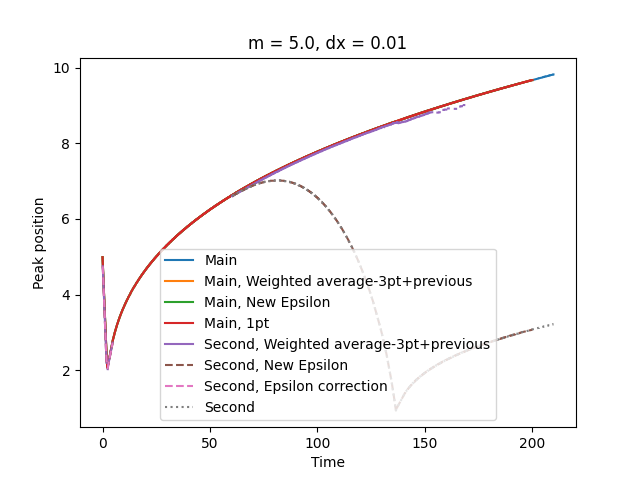

In [6]:
fig = plt.figure()

id = M[0]

for dx in dxs:
    try:
        plt.plot(main_peak[id][dx][:,0], main_peak[id][dx][:,1], label = f'Main')
    except KeyError:
        pass

for dx in dxs:
    try:
        plt.plot(main_peak2[id][dx][:,0], main_peak2[id][dx][:,1], label = f'Main, Weighted average-3pt+previous')
    except KeyError:
        pass
    
for dx in dxs:
    try:
        plt.plot(main_peak1[id][dx][:,0], main_peak1[id][dx][:,1], label = f'Main, New Epsilon')
    except KeyError:
        pass

for dx in dxs:
    try:
        plt.plot(main_peak3[id][dx][:,0], main_peak3[id][dx][:,1], label = f'Main, 1pt')
    except KeyError:
        pass

for dx in dxs:
    try:
        plt.plot(second_peak2[id][dx][:,0], second_peak2[id][dx][:,1], '-', label = f'Second, Weighted average-3pt+previous')
    except KeyError:
        pass

    
for dx in dxs:
    try:
        plt.plot(second_peak1[id][dx][:,0], second_peak1[id][dx][:,1], '--', label = f'Second, New Epsilon')
    except KeyError:
        pass

    
for dx in dxs:
    try:
        plt.plot(second_peak3[id][dx][:,0], second_peak3[id][dx][:,1], '--', label = f'Second, Epsilon correction')
    except KeyError:
        pass
    
for dx in dxs:
    try:
        plt.plot(second_peak[id][dx][:,0], second_peak[id][dx][:,1], ':', label = f'Second')
    except KeyError:
        pass


plt.xlabel("Time")
plt.ylabel("Peak position")

plt.title(f'm = {id}, {dx = }')
plt.legend()


In [22]:
import h5py

data = h5py.File('../misc/examplefuncs.h5', 'r')
kk = list(data.keys())

In [24]:
list(data[kk[0]]['e^b'])

[1.0, 4.0, 9.0, 16.0]